In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots

In [8]:
B1=3.6799119729375
B2=3.6837088479375
B3=3.6894041604375
B4=3.6979471291875
B5=3.7107615823125
Bcs = np.array([B1, B2, B3, B4, B5])

Bc_best=3.67552207
a_best=1.58

scale_factors = np.array([1, 2.78, 6.84, 16, 34])

In [9]:
Bc = 3.67552207
alpha = 1.69356833
B1_data = np.genfromtxt("data/P_mass1.dat")
B2_data = np.genfromtxt("data/P_mass2.dat")
B3_data = np.genfromtxt("data/P_mass3.dat")
B4_data = np.genfromtxt("data/P_mass4.dat")
B5_data = np.genfromtxt("data/P_mass5.dat")


In [10]:
B = np.array([3.6799119729375,
3.6837088479375,   
3.6894041604375,  
3.6979471291875,        
3.7107615823125] )
avg_masses = np.array([4316.56, 1609.39, 661.717, 291.716, 136.771])

In [11]:
# Using a standardized style set that largely holds to Nature's guidelines.
plt.style.use('science')
plt.style.use(['science','nature'])

C:\Users\0915564\AppData\Local\Temp\ipykernel_22304\1232017014.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(B5_data[:, 0], B5_data[:, 1], linewidth=1, c=colors[4], label=fr"$B \approx {str(B5)[:6]}$", s=2*size, marker="s")
C:\Users\0915564\AppData\Local\Temp\ipykernel_22304\1232017014.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(B4_data[:, 0], B4_data[:, 1] , linewidth=1, c=colors[3], 

0.004389902937500079 [4316.56  1609.39   661.717  291.716  136.771]


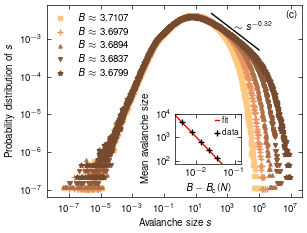

In [12]:
fig, ax1 = plt.subplots()
size = 4

B6 = 3.6000
B_values = [B1, B2, B3, B4, B5, B6]
norm = plt.Normalize(min(B_values[:-1])*0.995, max(B_values[:-1]))
colors = plt.cm.copper(norm(B_values))
colors[-1] = plt.cm.copper(1.0)
norm = matplotlib.colors.SymLogNorm(linthresh=0.01, vmin=min(B_values), vmax=max(B_values))

ax1.scatter(B5_data[:, 0], B5_data[:, 1], linewidth=1, c=colors[4], label=fr"$B \approx {str(B5)[:6]}$", s=2*size, marker="s")
ax1.scatter(B4_data[:, 0], B4_data[:, 1] , linewidth=1, c=colors[3], label=fr"$B \approx {str(B4)[:6]}$", s=5*size, marker="+")
ax1.scatter(B3_data[:, 0], B3_data[:, 1] , linewidth=1, c=colors[2], label=fr"$B \approx {str(B3)[:6]}$", s=1.3*size, marker="^")
ax1.scatter(B2_data[:, 0], B2_data[:, 1] , linewidth=1, c=colors[1], label=fr"$B \approx{str(B2)[:6]}$", s=1.7*size, marker="v")
ax1.scatter(B1_data[:, 0], B1_data[:, 1] , linewidth=1, c=colors[0], label=fr"$B \approx {str(B1)[:6]}$", s=3*size, marker="*")



X=np.arange(100, 1E5, 1)
ax1.plot(X, 0.02*X**-0.32, c="black")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(r"Avalanche size $s$")
ax1.set_ylabel(r"Probability distribution of $s$")
ax1.legend(frameon=False, loc="upper left", bbox_to_anchor=(-0.02, 1.))
ax1.yaxis.set_tick_params(direction="in")
ax1.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax1.xaxis.set_tick_params(direction="in")
ax1.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))

ax1.text(0.88, 0.91, r"$\sim s^{-0.32}$", transform=ax1.transAxes,
        horizontalalignment='right', verticalalignment='top')
ax1.text(0.98, .97, r"(c)", transform=ax1.transAxes,
        horizontalalignment='right', verticalalignment='top')

ax1.tick_params(axis='x', which='both', pad=5)
# OG: left, bottom, width, height = [0.455, 0.2, 0.265, 0.23]
left, bottom, width, height = [0.515, 0.245, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.set_xlabel(r"$B - B_\mathrm{c}(N)$")
ax2.set_ylabel(r"Mean avalanche size")
ax2.set_yscale("log")
ax2.set_xscale("log")
xmax = 0.15
xmin = 0.003
ymax = 1E4
ymin = 80

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)

import scipy
x_data = np.array(B - Bc).astype(float)
y_data = np.array(avg_masses).astype(float)
def fit_function(BminBc, a, g):
     return a * BminBc ** -g
print(x_data[0], y_data)

bounds = [[0.01,1.69356832],[1, 1.69356834]]

params, params_covariance = scipy.optimize.curve_fit(fit_function, x_data, y_data, bounds= bounds)
sampling = np.arange(0.002, xmax, 0.001)
ax2.plot(sampling, fit_function(sampling, params[0], params[1]), c="red", alpha=1, zorder=1, label=r"fit")
ax2.scatter(B-Bc, avg_masses, label=r"data", c="black", zorder=2, marker="+", s=20)
ax2.tick_params(axis="both")

ax2.legend(loc="upper right", fontsize=6, frameon= False, 
           handlelength=.5, handletextpad=0.4, bbox_to_anchor=(1.07, 1.08))
ax2.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax2.yaxis.set_tick_params(direction="in")
ax2.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax2.xaxis.set_tick_params(direction="in")
fig.savefig("avalanche_mass_fig.pdf", bbox_inches='tight')